# We are trying to understanding the data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import warnings
warnings.filterwarnings('ignore')



In [3]:
houses=pd.read_csv("C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques/train.csv")
houses.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_test = pd.read_csv("C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques/test.csv")
houses_test.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
houses.shape

(1460, 81)

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
houses.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data dependency

In [8]:

corr=houses.corr()["SalePrice"]
# print(np.argsort(corr, axis=0))
corr[np.argsort(corr, axis=0)[::-1]]  #np.argsort()表示返回其排序的索引


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
#OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF     ,FullBath,TotRmsAbvGrd,YearBuilt,
#YearRemodAdd 这些变量与SalePrice销售价格的相关性大于0.5
#EnclosedPorch and KitchenAbvGr这些变量与SalePrice销售价格的相关性呈现轻度负相关

# Draw a correlation chart

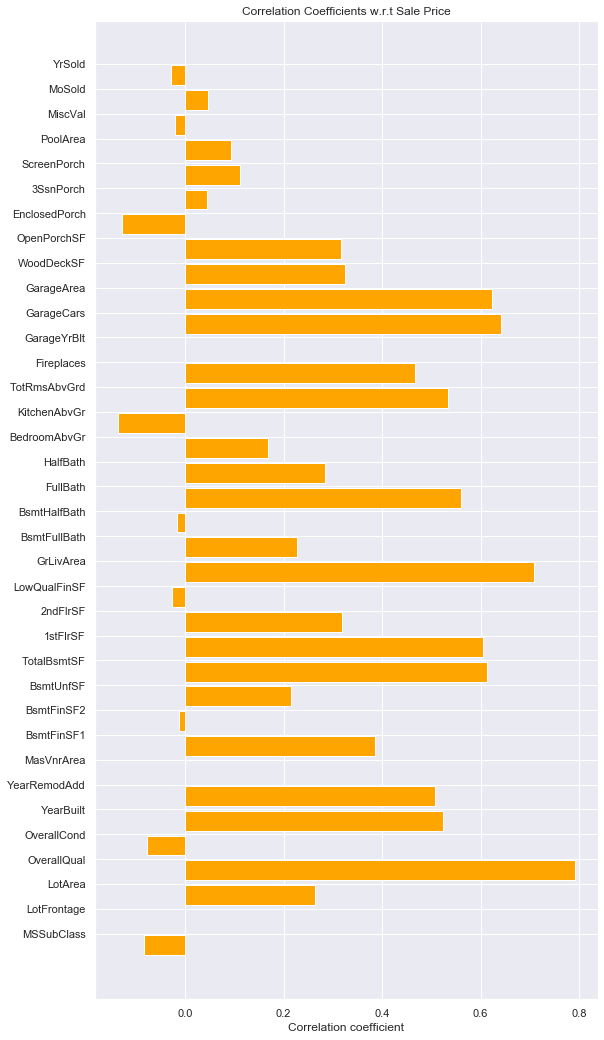

In [10]:

num_feat=houses.columns[houses.dtypes!=object]  #house.dtypes!=object表示输出不是object的类型
num_feat=num_feat[1:-1]  #去掉第0项:ID
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
#np.corrcoef()计算皮尔逊相关系数
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(9,18))
#fig,ax = plt.subplots()的意思是，同时在subplots里建立一个fig对象，建立一个axis对象 
# 这样就不用先plt.figure() 
# 再plt.add_subplot()了

rects = ax.barh(ind, np.array(values), color='orange')  #ax.barh表示水平条状图
ax.set_yticks(ind+((width)/2.)) #设置y轴刻度宽度
ax.set_yticklabels(labels, rotation='horizontal')  #设置y轴标签
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");


In [11]:
correlations=houses.corr()
# print(correlations)
attrs = correlations.iloc[:-1,:-1] #目标变量除外的所有列

threshold = 0.5

#unstack()表示降维dataframe，转换为行列形式，默认level=-1
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()


#将得到的数据进行重新排序,并生成相关性的dataframe
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)),important_corrs[key]) for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])


#以绝对值进行分类排序
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs


,Attribute Pair,Correlation
6,"(GarageArea, GarageCars)",0.882475
24,"(GarageYrBlt, YearBuilt)",0.825667
19,"(GrLivArea, TotRmsAbvGrd)",0.825489
3,"(1stFlrSF, TotalBsmtSF)",0.819530
21,"(2ndFlrSF, GrLivArea)",0.687501
15,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
9,"(BsmtFinSF1, BsmtFullBath)",0.649212
25,"(GarageYrBlt, YearRemodAdd)",0.642277
20,"(FullBath, GrLivArea)",0.630012
8,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


# Thermodynamic diagram 

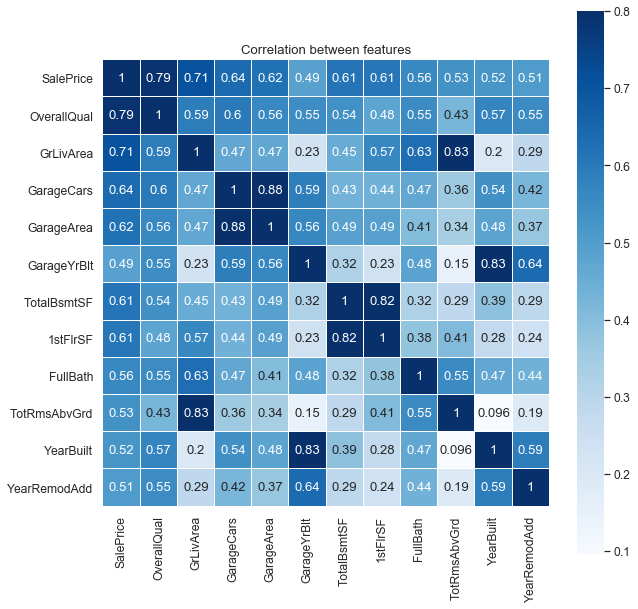

In [12]:

import seaborn as sns
corrMatrix=houses[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)  #font_scale表示图像与字体大小比例
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="white")
plt.title('Correlation between features');


# Key features

In [13]:

houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)


,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [14]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)


,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


# Visualization of target variables

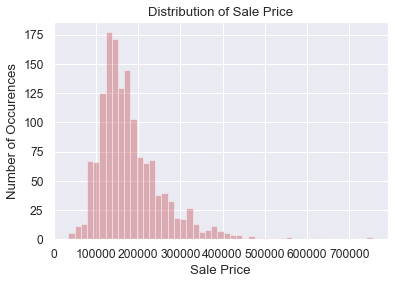

In [15]:

sns.distplot(houses['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");


# Remove the outliers

527331.9149999974


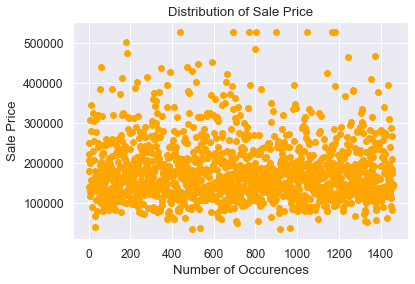

In [16]:

#np.percentile()沿着指定的轴计算数据的第q百分位数
upperlimit = np.percentile(houses.SalePrice.values, 99.5)
print(upperlimit)
houses['SalePrice'].loc[houses['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(houses.shape[0]), houses["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");


# Missing value processing

In [17]:
# 查看是否有有缺失值的列
null_columns=houses.columns[houses.isnull().any()]  #.any()表示是否所有元素为真
#得到null_columns为一个含空值的列的list
houses[null_columns].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

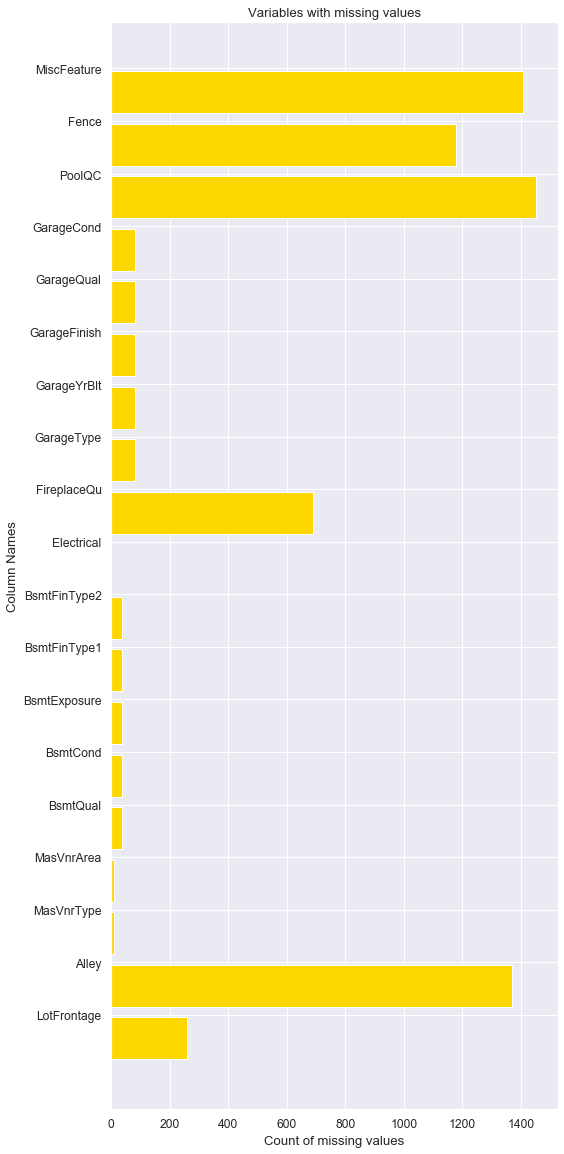

In [18]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(houses[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(8,20))
rects = ax.barh(ind, np.array(values), color='gold')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");


# Multivariate analysis

# Street distance

In [19]:
houses['SqrtLotArea']=np.sqrt(houses['LotArea'])
houses['LotFrontage'].corr(houses['SqrtLotArea'])



0.6020022167939364

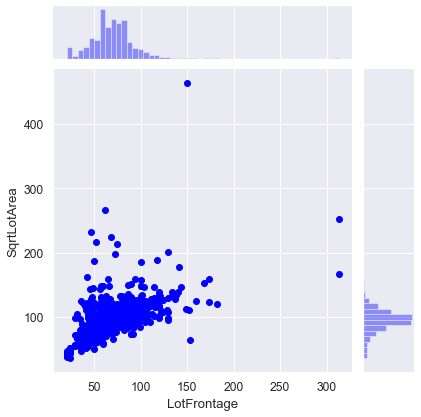

In [20]:
sns.jointplot(houses['LotFrontage'],houses['SqrtLotArea'],color='blue');


In [21]:
filter = houses['LotFrontage'].isnull()
houses.LotFrontage[filter]=houses.SqrtLotArea[filter]
houses.LotFrontage


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

# Masonry veneer type and Masonry veneer area

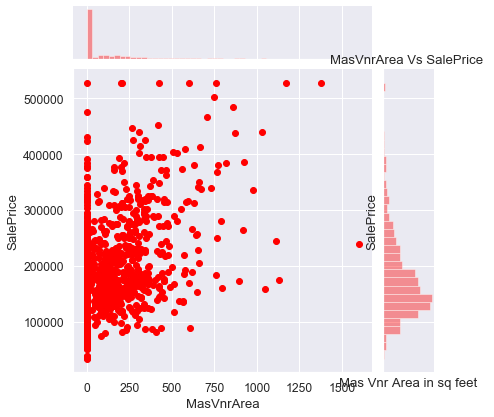

In [22]:
sns.jointplot(houses['MasVnrArea'],houses['SalePrice'],color='red');
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");


In [23]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('None')
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0.0)

# Bivariate analysis

# OverAllQual

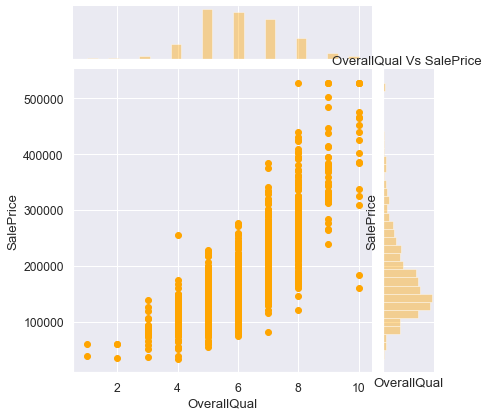

In [24]:
sns.jointplot(houses['OverallQual'],houses['SalePrice'],color='orange')
plt.title("OverallQual Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("OverallQual");


# Alley

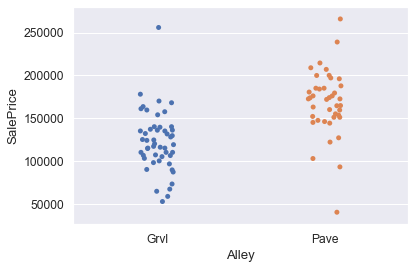

In [25]:
sns.stripplot(x=houses["Alley"], y=houses["SalePrice"],jitter=True);
houses["Alley"] = houses["Alley"].fillna('None')

# TotalBsmtSF

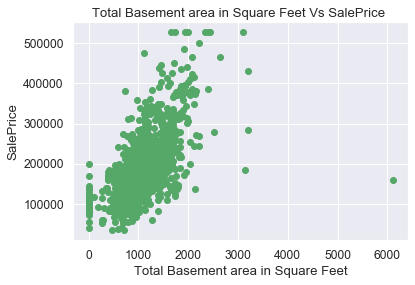

In [26]:
plt.scatter(houses["TotalBsmtSF"],houses["SalePrice"],color='g')
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");


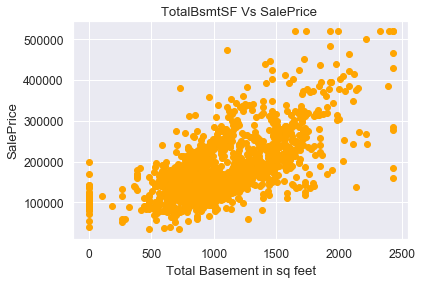

In [71]:
#地下室总面积，有几个的异常值，让我们去除这些值
upperlimit = np.percentile(houses.TotalBsmtSF.values, 99.5)
houses['TotalBsmtSF'].loc[houses['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(houses.TotalBsmtSF, houses["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");


We need to wipe out those values

In [72]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houses[basement_cols][houses['BsmtQual'].isnull()==True]


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [74]:
for col in basement_cols:
    if 'FinSF'not in col:
        houses[col] = houses[col].fillna('None')


# Fireplaces

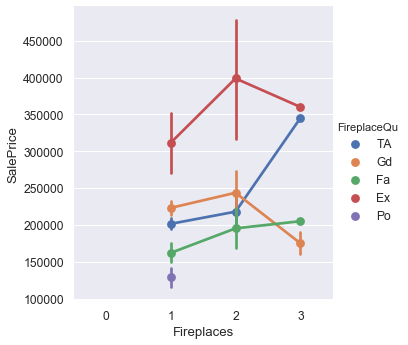

In [75]:
sns.catplot(x="Fireplaces",y="SalePrice",data=houses,hue='FireplaceQu',kind='point');


In [76]:
#如果壁炉质量存在缺失值，意味着房屋没有壁炉
houses["FireplaceQu"] = houses["FireplaceQu"].fillna('None')
pd.crosstab(houses.Fireplaces, houses.FireplaceQu) 
#pd.crosstab()表示计算几个简单因子出现频次的交叉表


FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


# GarageArea

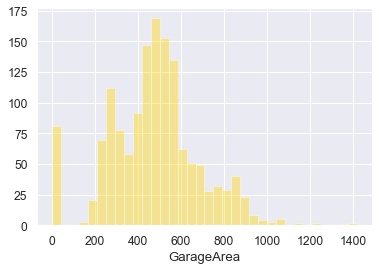

In [81]:
sns.distplot(houses["GarageArea"],color='gold', kde=False);


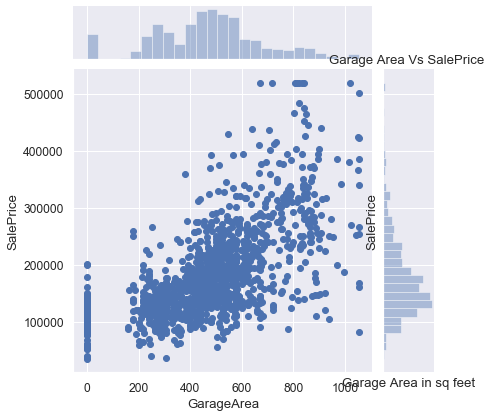

In [91]:
#车库面积存在一些异常值，去除这些异常值（套路代码）
upperlimit = np.percentile(houses.GarageArea.values, 99.5)
houses['GarageArea'].loc[houses['GarageArea']>upperlimit] = upperlimit

sns.jointplot(houses['GarageArea'], houses['SalePrice'],color='b')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");


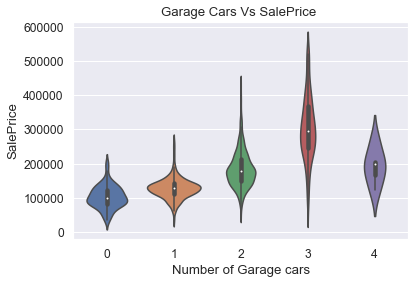

In [92]:
sns.violinplot(houses["GarageCars"],houses["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");


In [93]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
houses[garage_cols][houses['GarageType'].isnull()==True]


,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0.0
48,NaN,NaN,NaN,NaN,NaN,0,0.0
78,NaN,NaN,NaN,NaN,NaN,0,0.0
88,NaN,NaN,NaN,NaN,NaN,0,0.0
89,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0.0
1407,NaN,NaN,NaN,NaN,NaN,0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0,0.0
1450,NaN,NaN,NaN,NaN,NaN,0,0.0


In [94]:
#套路代码，填充空值
for col in garage_cols:
    if houses[col].dtype==np.object:
        houses[col] = houses[col].fillna('None')
    else:
        houses[col] = houses[col].fillna(0)


# PoolQC

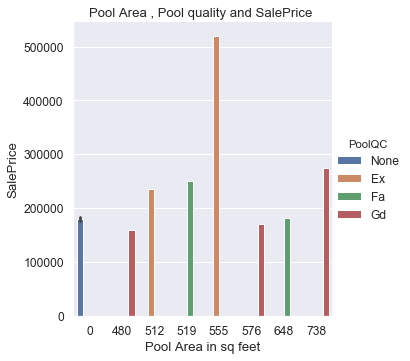

In [98]:
#如果泳池面积为0，则意味这些房屋没有泳池。
#因此，我们可以用None来替代泳池质量。
houses["PoolQC"] = houses["PoolQC"].fillna('None')
sns.catplot("PoolArea","SalePrice",data=houses,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");



# Fence

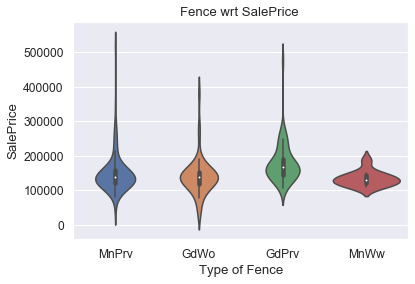

In [99]:
sns.violinplot(houses["Fence"],houses["SalePrice"])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");


In [100]:
houses["Fence"] = houses["Fence"].fillna('None')


# Miscelleneous Features

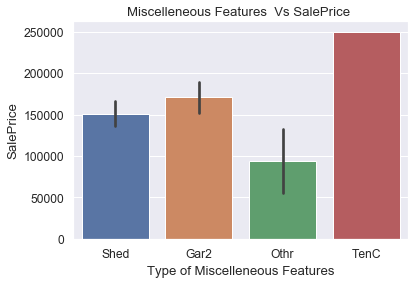

In [102]:
sns.barplot(houses["MiscFeature"],houses["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");


In [103]:
#一些房屋没有其他特征，如棚子、网球场等等
houses["MiscFeature"] = houses["MiscFeature"].fillna('None')
#让我们确认我们已经删除了所有缺失值
houses[null_columns].isnull().sum()


LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      1
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

# Data visualization

The zoning

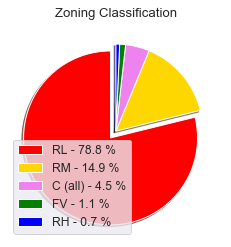

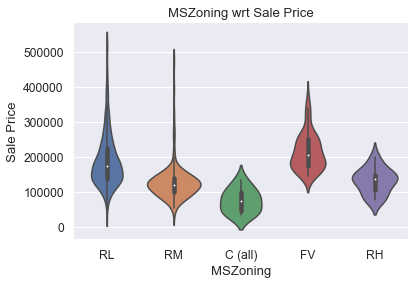

In [118]:

labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values  #返回一个统计频次的list
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
#具体链接：http://www.runoob.com/python/python-func-zip.html
#str.format()具体使用：http://www.runoob.com/python/att-string-format.html
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['red', 'gold', 'violet', 'green','blue']
#explode表示偏移半径
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
#plt.legend()表示图例，loc表示图例位置
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()



sns.violinplot(houses.MSZoning,houses["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");


# 1stFlrSF

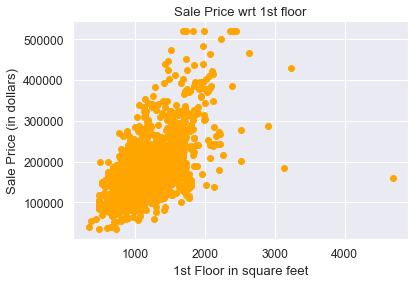

In [106]:
plt.scatter(houses["1stFlrSF"],houses.SalePrice, color='orange')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");


In [107]:
houses['1stFlrSF']


0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

# GrLivArea

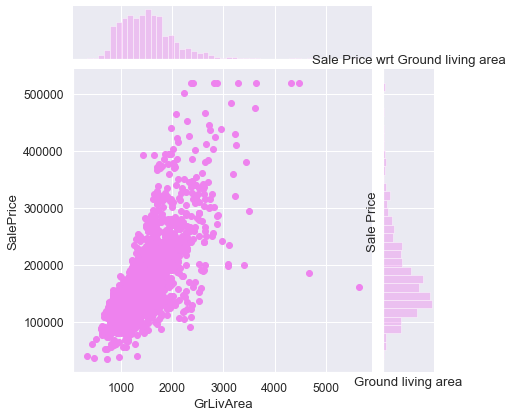

In [119]:
sns.jointplot( houses['GrLivArea'],houses['SalePrice'],color='violet')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");


# SalePriceSF

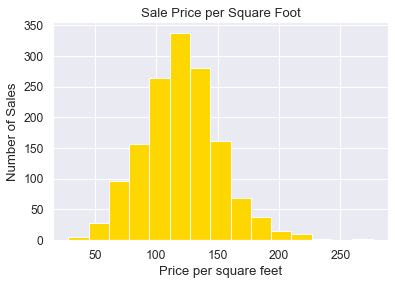

In [120]:
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")  #bin表示柱状图被分割的段数
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');


In [121]:
#每平方英尺的平均售价
print("$",houses.SalePriceSF.mean())


$ 120.4166848587413


# YearBuilt

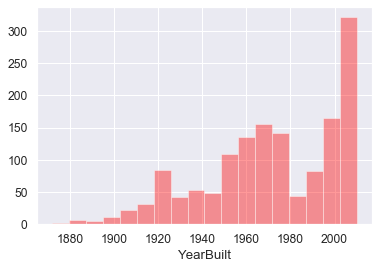

In [125]:
#建筑年份
sns.distplot(houses["YearBuilt"],color='red', kde=False);


# YearRemodAdd

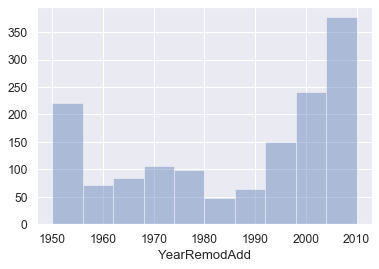

In [128]:
#改造年份
sns.distplot(houses["YearRemodAdd"].astype(int),color='b', kde=False);


# YrSold

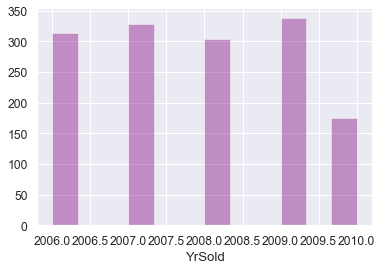

In [130]:

sns.distplot(houses["YrSold"],color='purple', kde=False);


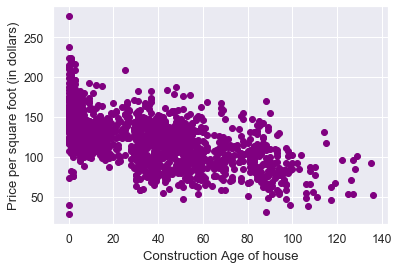

In [132]:
#房龄
houses['ConstructionAge'] = houses['YrSold'] - houses['YearBuilt']
plt.scatter(houses['ConstructionAge'], houses['SalePriceSF'],color='purple')
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");


# HeatingQC

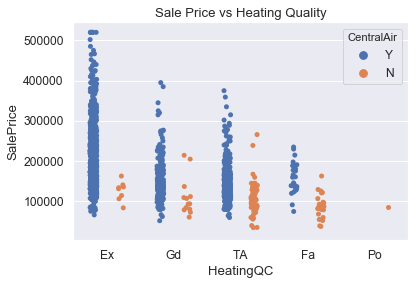

In [137]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=houses,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");


# FullBath

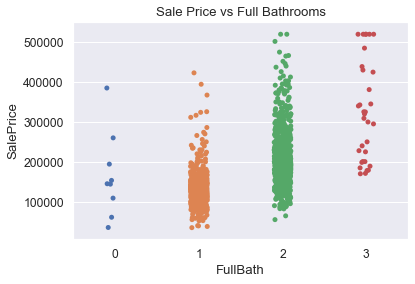

In [139]:
sns.stripplot(x="FullBath",y="SalePrice",data=houses,jitter=True)
plt.title("Sale Price vs Full Bathrooms");


# HalfBath

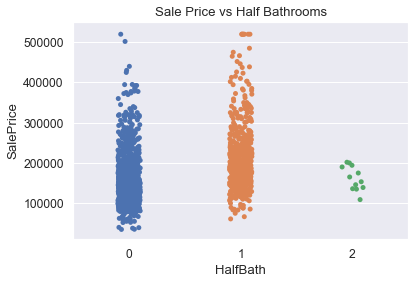

In [140]:
sns.stripplot(x="HalfBath",y="SalePrice",data=houses,jitter=True)
plt.title("Sale Price vs Half Bathrooms");


# TotRmsAbvGrd

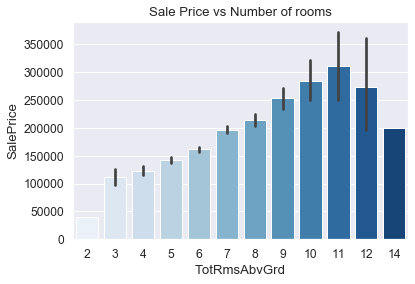

In [142]:
sns.barplot(houses["TotRmsAbvGrd"],houses["SalePrice"],palette="Blues")
plt.title("Sale Price vs Number of rooms");


# KitchenAbvGr

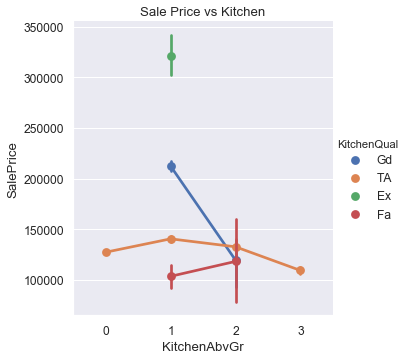

In [145]:
sns.factorplot("KitchenAbvGr","SalePrice",data=houses,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");


Having a quality kitchen can significantly increase the price of a home.

# Neighborhood

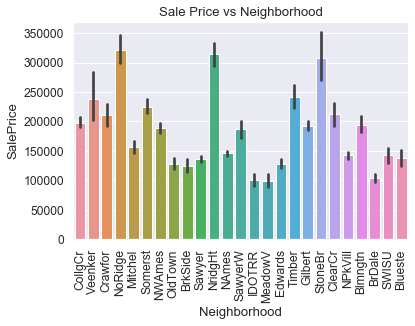

In [147]:
plt.xticks(rotation=90) 
sns.barplot(houses["Neighborhood"],houses["SalePrice"])
plt.title("Sale Price vs Neighborhood");


# 2ndFlrSF

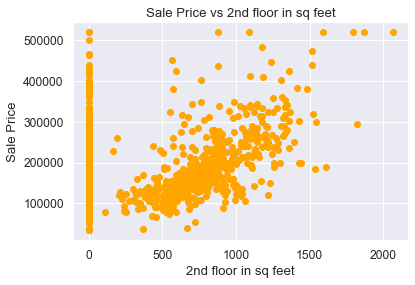

In [149]:
plt.scatter(houses["2ndFlrSF"],houses["SalePrice"],color="orange")
plt.title("Sale Price vs 2nd floor in sq feet");
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");


# Street

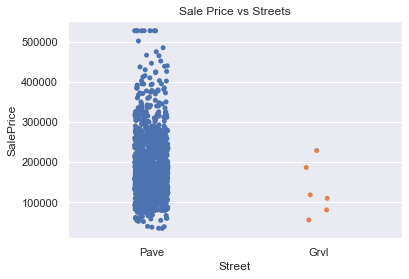

In [29]:
sns.stripplot(x=houses["Street"], y=houses["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");


# Training model

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
